In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [32]:
data1 = pd.read_csv('churn_clustered.csv')
data1.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,K_Means_clust,PAM_clust
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,0,0,0,1,0,0,0,1,1,0
1,1.0,9.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,1,1,0,0,1,0,0,1,0,1
2,1.0,9.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,0,1,0,0,1,0,0,1,0,1
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,0,1,0,1,0,0,0,1,1,0
4,1.0,0.0,1.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,...,0,1,0,0,1,0,0,1,0,1


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split

In [34]:
X = data1.drop('Churn', axis=1)
y = data1['Churn']

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.73795855,  1.46977096, -1.17879509, ...,  1.46107627,
         0.7727633 , -0.90404728],
       [-0.1348657 , -0.71528595, -0.93153381, ...,  1.46107627,
        -1.29405731,  1.10613684],
       [-0.1348657 , -0.71528595,  1.78834025, ...,  1.46107627,
        -1.29405731,  1.10613684],
       ...,
       [-1.09981425, -0.71528595, -0.56064189, ..., -0.68442697,
         0.7727633 , -0.90404728],
       [ 1.55379427,  1.46977096, -0.80790317, ..., -0.68442697,
         0.7727633 , -0.90404728],
       [-0.25548427, -0.71528595, -0.06611933, ..., -0.68442697,
         0.7727633 , -0.90404728]])

In [36]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,K_Means_clust,PAM_clust
0,-0.737959,1.469771,-1.178795,0.092654,-0.67290,-0.772992,1.875626,1.584290,-1.304023,-0.411136,...,-0.472632,-1.227468,-0.280257,1.321492,-0.765451,-0.221808,-1.062709,1.461076,0.772763,-0.904047
1,-0.134866,-0.715286,-0.931534,0.092654,0.30375,-0.048392,1.092812,1.584290,-0.187486,-1.344668,...,2.115810,0.814685,-0.280257,-0.756720,1.306419,-0.221808,-1.062709,1.461076,-1.294057,1.106137
2,-0.134866,-0.715286,1.788340,-1.324850,0.30375,-0.048392,0.701405,1.584290,-0.466620,-1.344668,...,-0.472632,0.814685,-0.280257,-0.756720,1.306419,-0.221808,-1.062709,1.461076,-1.294057,1.106137
3,-1.220433,1.469771,-0.066119,-1.324850,0.30375,1.400807,1.484219,-0.631198,2.045589,-1.344668,...,-0.472632,0.814685,-0.280257,1.321492,-0.765451,-0.221808,-1.062709,1.461076,0.772763,-0.904047
4,-1.220433,-0.715286,-0.437011,0.092654,-0.67290,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,...,-0.472632,0.814685,-0.280257,-0.756720,1.306419,-0.221808,-1.062709,1.461076,-1.294057,1.106137


In [37]:
x = X_scaled.copy(deep=True)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1, stratify=y)

In [39]:
# CART Model
mod7 = DecisionTreeClassifier(random_state=1, criterion='gini')

In [40]:
mod7.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [41]:
mod7.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

/home/anmol/anaconda3/envs/pycaret/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


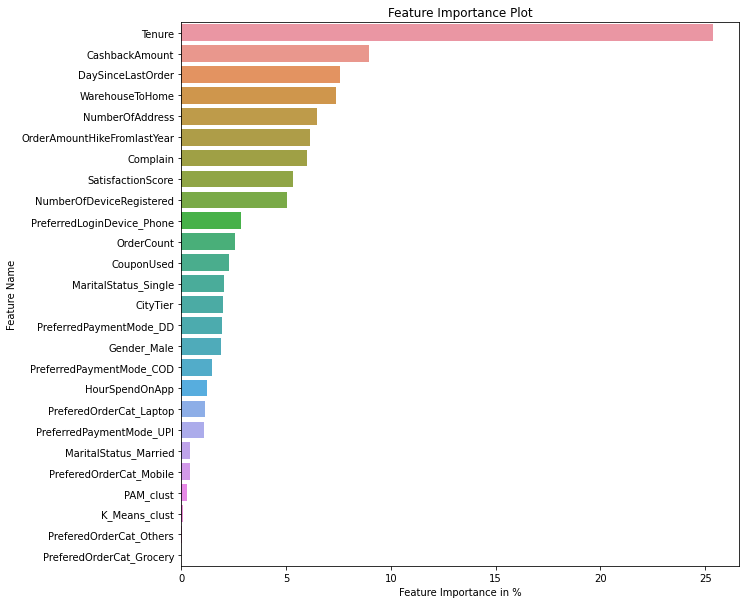

In [42]:
p = pd.DataFrame(mod7.feature_importances_*100, index=x_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(p[0], p.index,)
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
#plt.savefig('q2_Feature Importance of Variables for CART Model.png')
plt.show()

In [43]:
train_pred_mod7 = mod7.predict(x_train)
test_pred_mod7 = mod7.predict(x_test)

In [44]:
#training data
print(classification_report(y_train, train_pred_mod7))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



In [45]:
#testing data
print(classification_report(y_test, test_pred_mod7))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1405
         1.0       0.88      0.88      0.88       284

    accuracy                           0.96      1689
   macro avg       0.93      0.93      0.93      1689
weighted avg       0.96      0.96      0.96      1689



Text(0.5, 1.0, 'Confusion Matrix for training data')

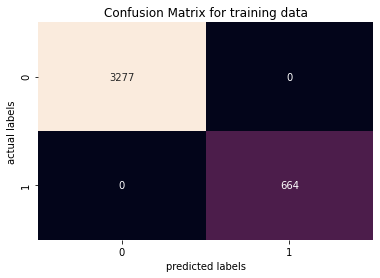

In [46]:
sns.heatmap(confusion_matrix(y_train, train_pred_mod7), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')
plt.title('Confusion Matrix for training data')

Text(33.0, 0.5, 'actual lables')

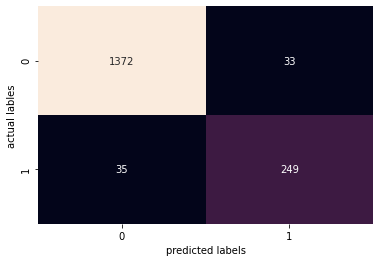

In [47]:
sns.heatmap(confusion_matrix(y_test, test_pred_mod7), annot=True, cbar=False, fmt='d')
plt.xlabel('predicted labels')
plt.ylabel('actual lables')

In [48]:
#training data
print(mod7.score(x_train, y_train))

1.0


In [49]:
#testing data
print(mod7.score(x_test, y_test))

0.9597394908229722


the auc score for training dataset is: 1.000


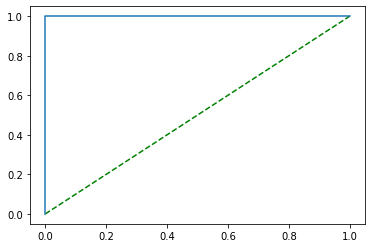

In [50]:
# auc score
probs13= mod7.predict_proba(x_train)
probs13 = probs13[:,1]
auc_score_mod7_train = roc_auc_score(y_train, probs13)
print('the auc score for training dataset is: %.3f'%auc_score_mod7_train)

# roc curve
mod7_train_tpr, mod7_train_fpr, mod7_train_thresholds = roc_curve(y_train, probs13)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(mod7_train_tpr, mod7_train_fpr)

the auc score on the testing dataset is: 0.927


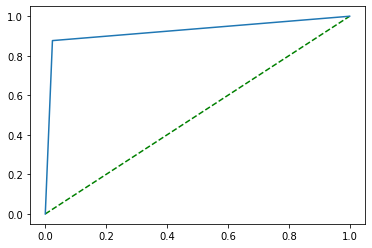

In [51]:
# testing dataset

probs14 = mod7.predict_proba(x_test)
probs14 = probs14[:,1]

auc_score_mod7_test = roc_auc_score(y_test, probs14)
print('the auc score on the testing dataset is: %.3f' %auc_score_mod7_test)


mod7_test_tpr, mod7_test_fpr, mod7_thresholds = roc_curve(y_test, probs14)
plt.plot([0,1],[0,1], linestyle='--', color='g')
plt.plot(mod7_test_tpr, mod7_test_fpr)

In [52]:
# Function for Classification Report, Confusion matrix, Model Score, AUC score, ROC Curve

In [53]:
train_pred_mod7 = mod7.predict(x_train)
test_pred_mod7 = mod7.predict(x_test)

In [54]:
# #training data
# print(classification_report(y_train, train_pred_mod7))

In [55]:
# #testing data
# print(classification_report(y_test, test_pred_mod7))

In [56]:
# sns.heatmap(confusion_matrix(y_train, train_pred_mod7), annot=True, cbar=False, fmt='d')
# plt.xlabel('predicted labels')
# plt.ylabel('actual labels')


# sns.heatmap(confusion_matrix(y_test, test_pred_mod7), annot=True, cbar=False, fmt='d')
# plt.xlabel('predicted labels')
# plt.ylabel('actual lables')

In [57]:
#training data
print(mod7.score(x_train, y_train))

#testing data
print(mod7.score(x_test, y_test))

1.0
0.9597394908229722


In [58]:
# classification matrix, confusion matrix, model score, 
def model_performance(x_train_data,
                      y_train_data, 
                      train_preds,
                      x_test_data,
                      y_test_data,
                      test_preds):
    a = classification_report(y_train_data, train_preds)
    b = classification_report(y_test_data, test_preds)
    
    c = round(mod7.score(x_train_data, y_train_data),4)
    d = round(mod7.score(x_test_data, y_test_data),4)
    
    print('classification report for training data')
    print(a)
    print('\n')
    print('classification report for testing data')
    print(b)
    print('\n')
    print('the model score for training data is ',c)
    print('the model score for testing data is ',d)
    print('\n')
    
    
    from seaborn import heatmap
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(10,5)

    sns.heatmap(confusion_matrix(y_test_data, test_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Testing Data')
    plt.subplot(1,2,1)

    sns.heatmap(confusion_matrix(y_train_data, train_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Training Data')
    plt.subplot(1,2,2)

In [60]:
# model_performance(y_train, train_pred_mod7, y_test, test_pred_mod7)

classification report for training data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



classification report for testing data
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1405
         1.0       0.88      0.88      0.88       284

    accuracy                           0.96      1689
   macro avg       0.93      0.93      0.93      1689
weighted avg       0.96      0.96      0.96      1689



the model score for training data is  1.0
the model score for testing data is  0.9597




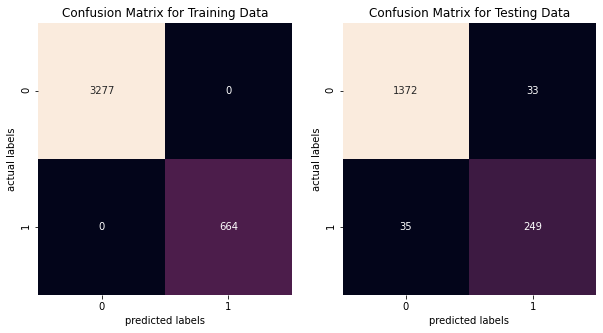

In [61]:
model_performance(x_train, y_train, train_pred_mod7,x_test,y_test, test_pred_mod7)

# K-Fold Cross Validation

In [67]:
def k_fold_cross_valscore(model_name,
                          x_train_data,
                          y_train_data,
                          folds
                         ):
    from sklearn.model_selection import cross_val_score
    
    model_kfold_recall = cross_val_score(model_name, x_train_data, y_train_data,
                                         cv=folds, scoring='recall', verbose=3)
    model_kfold_accuracy = cross_val_score(model_name, x_train_data, y_train_data,
                                           cv=folds, scoring='accuracy', verbose=3)
    model_kfold_precision = cross_val_score(model_name, x_train_data, y_train_data,
                                           cv=folds, scoring='precision', verbose=3)
    model_kfold_f1 = cross_val_score(model_name, x_train_data, y_train_data,
                                           cv=folds, scoring='f1', verbose=3)
    
    print('\n')
    print('the model recall values for ',folds, " folds:")
    print(model_kfold_recall)
    print('\n')
    print('the model accuracy values for ',folds, " folds:")
    print(model_kfold_accuracy)
    print('\n')
    print('the model precision values for ',folds, " folds:")
    print(model_kfold_precision)
    print('\n')
    print('the model f1 values for ',folds, " folds:")
    print(model_kfold_f1)
    print('\n')
    
    print("The mean recall for the model after " ,folds," folds is ", np.mean(model_kfold_recall))
    print("The mean accuracy for model after ",folds," folds is", np.mean(model_kfold_accuracy))
    print("the mean precision for the model after ",folds," folds is",np.mean(model_kfold_precision))
    print("the mean f1 score for the model after ",folds," folds is", np.mean(model_kfold_f1))

In [68]:
 k_fold_cross_valscore(mod7, x_train, y_train, folds=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.782) total time=   0.0s
[CV] END ................................ score: (test=0.811) total time=   0.0s
[CV] END ................................ score: (test=0.789) total time=   0.0s
[CV] END ................................ score: (test=0.684) total time=   0.0s
[CV] END ................................ score: (test=0.774) total time=   0.0s
[CV] END ................................ score: (test=0.929) total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=0.921) total time=   0.0s
[CV] END ................................ score: (test=0.920) total time=   0.0s
[CV] END ................................ score: (test=0.900) total time=   0.0s
[CV] END ................................ score: (test=0.912) total time=   0.0s
[CV] END ................................ score: (test=0.794) total time=   0.0s
[CV] END ................................ score: (test=0.743) total time=   0.0s
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] END ................................ score: (test=0.711) total time=   0.0s
[CV] END ................................ score: (test=0.725) total time=   0.0s
[CV] END ................................ score: (test=0.788) total time=   0.0s
[CV] END ................................ score: (test=0.775) total time=   0.0s
[CV] END ................................ score: (test=0.769) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
